<a href="https://colab.research.google.com/github/TheKoray18/KNN-Tree-Ensemble-Algorithms/blob/main/Biomechanical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [92]:
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/column_2C_weka.csv')

- pelvic_incidence = pelvik insidans
- pelvic_tilt numeric = pelvik eğim sayısal
- lumbar_lordosis angle = lomber lordoz açısı
- sacral_slope = sakral eğim
- pelvic_radius = pelvik yarıçap
- degree_spondylolisthesis = spondilolistez derecesi


In [93]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [94]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [52]:
data.shape

(310, 7)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


- Değişkenlerimizin sadece tipini görmek istersek ".dtypes" kullanırız

In [54]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

- Datamızın betimsel istatistik değerlerine bakalım

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


- Sürekli değişkenlerimizin ;

  - Ortalamasına 
  - Standart Sapmasına 
  - Standart hatasına 
  - Güven aralığına bakacağız

In [56]:
!pip install researchpy

In [57]:
import researchpy as rp

rp.summary_cont(data[['pelvic_incidence','pelvic_radius','sacral_slope']])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,pelvic_incidence,310.0,60.4967,17.2365,0.9790,58.5704,62.4229
1,pelvic_radius,310.0,117.9207,13.3174,0.7564,116.4324,119.4090
2,sacral_slope,310.0,42.9538,13.4231,0.7624,41.4537,44.4539


- Sürekli değişkenlerimiz arasındaki kovaryansa bakacağız

In [58]:
data[['pelvic_incidence','pelvic_radius','sacral_slope']].cov()

,pelvic_incidence,pelvic_radius,sacral_slope
pelvic_incidence,297.097633,-56.804919,188.555315
pelvic_radius,-56.804919,177.352531,-61.159039
sacral_slope,188.555315,-61.159039,180.179672


- Bu iki değişkenimiz arasında azalan doğrusal bir ilişki olduğunu gösterir

- Köşegenlerde ki değerler ise varyans değerleridir

In [59]:
data[['pelvic_radius','sacral_slope']].cov()

,pelvic_radius,sacral_slope
pelvic_radius,177.352531,-61.159039
sacral_slope,-61.159039,180.179672


- Aşağıda varyans değerlerini görüyoruz tekrardan

In [60]:
data[['pelvic_radius','sacral_slope']].var()

pelvic_radius    177.352531
sacral_slope     180.179672
dtype: float64

In [61]:
data[['pelvic_incidence','sacral_slope']].cov()

,pelvic_incidence,sacral_slope
pelvic_incidence,297.097633,188.555315
sacral_slope,188.555315,180.179672


In [62]:
data[['pelvic_incidence','sacral_slope','pelvic_radius']].corr()

,pelvic_incidence,sacral_slope,pelvic_radius
pelvic_incidence,1.000000,0.814960,-0.247467
sacral_slope,0.814960,1.000000,-0.342128
pelvic_radius,-0.247467,-0.342128,1.000000


- "pelvic_incidence" ile "sacral_slope" değişkenlerimiz arasında güçlü bir pozitif doğrusal ilişki vardır

In [63]:
data[['pelvic_incidence','sacral_slope']].corr()

,pelvic_incidence,sacral_slope
pelvic_incidence,1.00000,0.81496
sacral_slope,0.81496,1.00000


- Bu iki değişkenin doğrusal bir ilişkisini grafik üzerinde görelim

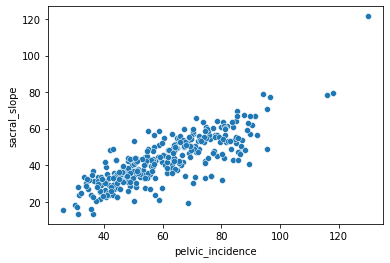

In [64]:
sns.scatterplot(x='pelvic_incidence',y='sacral_slope',data=data)

- "pelvic_radius" ve "sacral_slope" değişkenlerimiz arasında düşük bir negatif korelasyon vardır

In [65]:
data[['pelvic_radius','sacral_slope']].corr()

,pelvic_radius,sacral_slope
pelvic_radius,1.000000,-0.342128
sacral_slope,-0.342128,1.000000


- Bu iki değişkenimiz arasındaki düşük negatif korelasyonu grafikte görelim

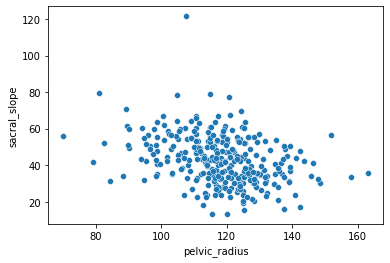

In [66]:
import seaborn as sns

sns.scatterplot(x='pelvic_radius',y='sacral_slope',data=data);

- Kategorik değişkenimiz için bakacağız

In [67]:
rp.summary_cat(data[['class']])

,Variable,Outcome,Count,Percent
0,class,Abnormal,210,67.74
1,,Normal,100,32.26


- Eksik değerlerimiz var mı yok mu ona bakıyoruz

In [68]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

- Veri Setimizde hiç eksik değer olmadığını görüyoruz

In [69]:
data.isnull().sum().sum()

0

# Veri Görselleştirme

- Değişkenlerimizin sütun grafiğine bakalım

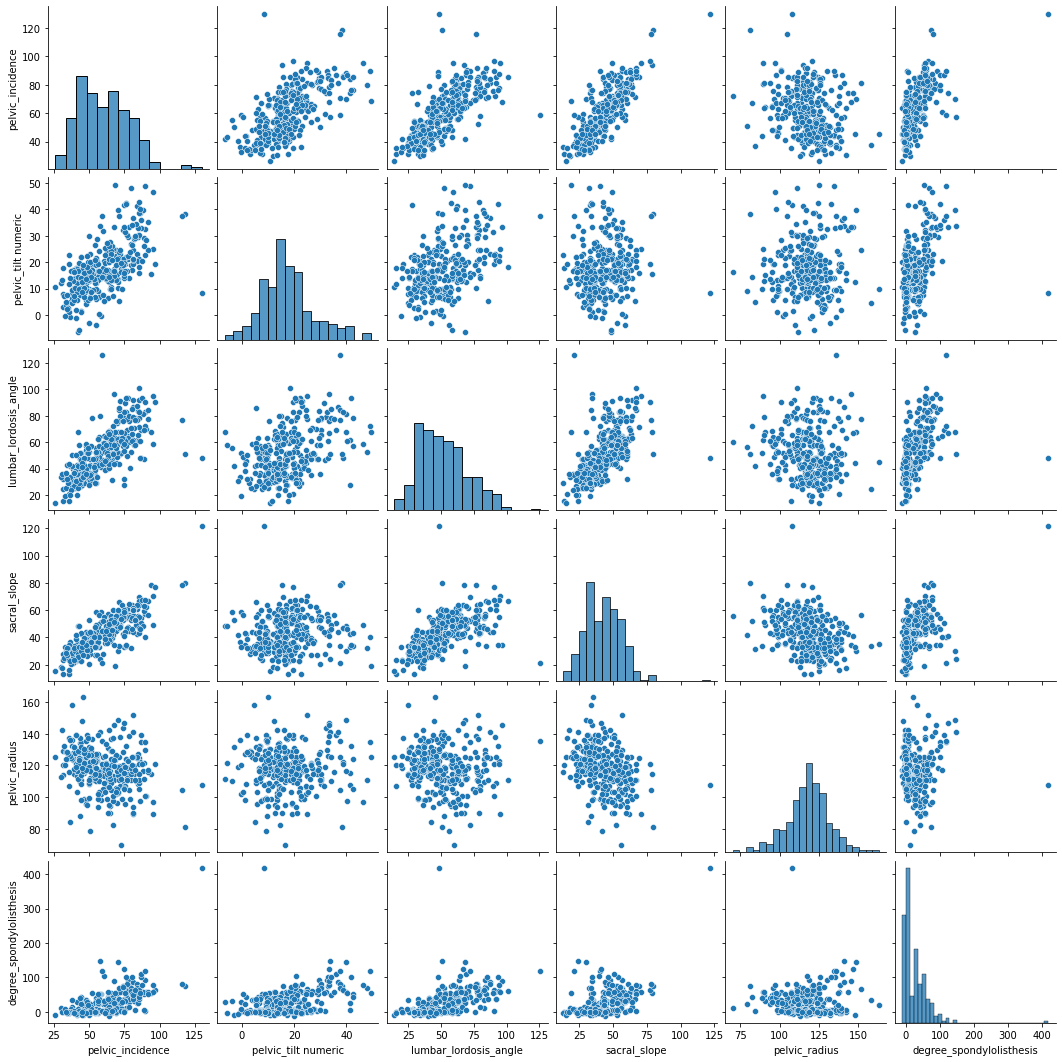

In [70]:
sns.pairplot(data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


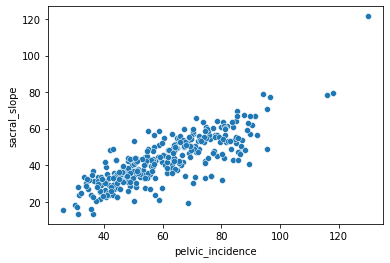

In [71]:
sns.scatterplot('pelvic_incidence','sacral_slope',data=data);

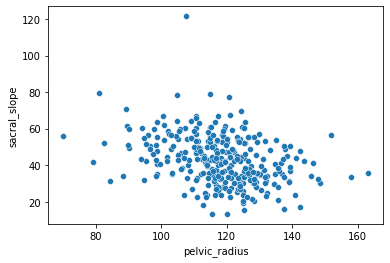

In [72]:
sns.scatterplot(x='pelvic_radius',y='sacral_slope',data=data)

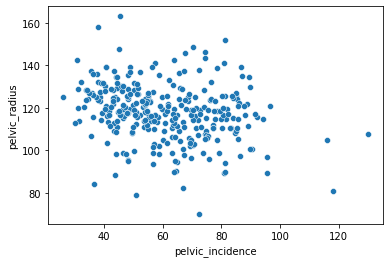

In [73]:
import seaborn as sns

sns.scatterplot(x='pelvic_incidence',y='pelvic_radius',data=data)

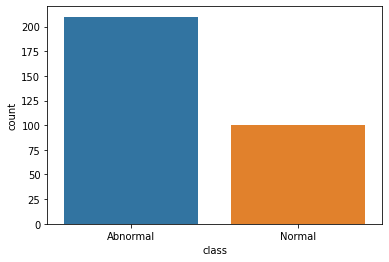

In [96]:
import seaborn as sns 

sns.countplot(x=data['class'])

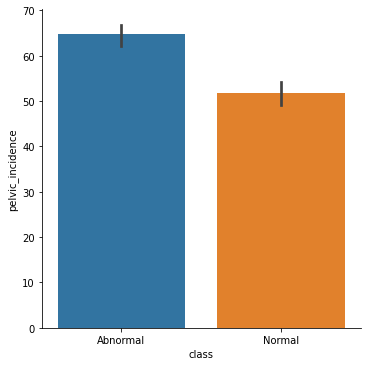

In [78]:
sns.catplot(x='class',y='pelvic_incidence',kind='bar',data=data);

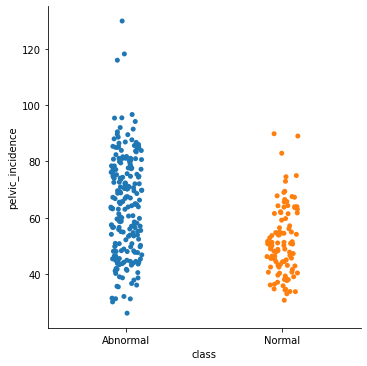

In [79]:
sns.catplot(x='class', y = 'pelvic_incidence' , data = data)

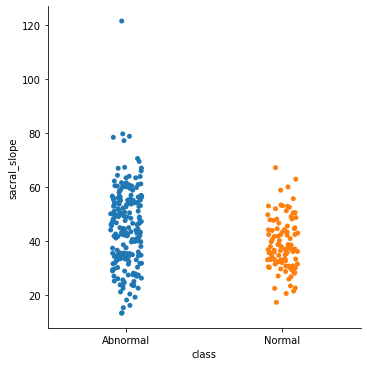

In [80]:
sns.catplot(x='class',y='sacral_slope',data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


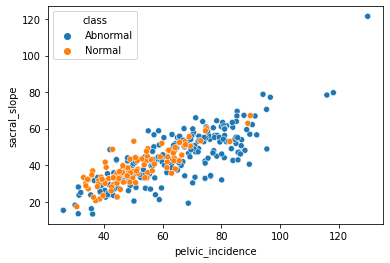

In [81]:
sns.scatterplot('pelvic_incidence','sacral_slope',hue='class',data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


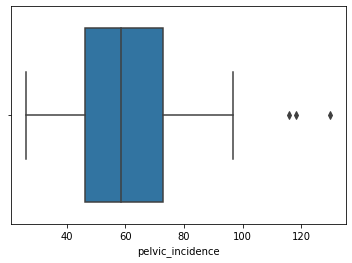

In [82]:
sns.boxplot(data['pelvic_incidence']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


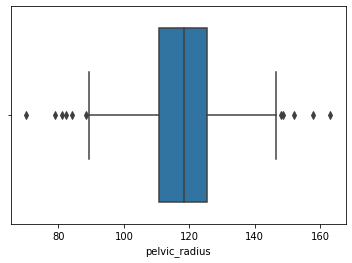

In [83]:
sns.boxplot(data['pelvic_radius']);

- Yukarıda ki boxplot grafiklerine bakarak "pelvic_radius" değişkeninin daha yukarıda olduğunu görebiliyoruz
- pelvic_radius değişkeninde Class sınıfımızın 'normal' sınıfının median çevresinde daraldığını o değerlerde sıkıştığını görebiliyoruz

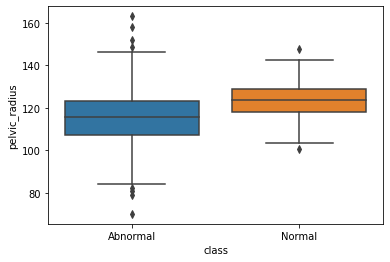

In [84]:
sns.boxplot(x='class',y='pelvic_radius',data=data);

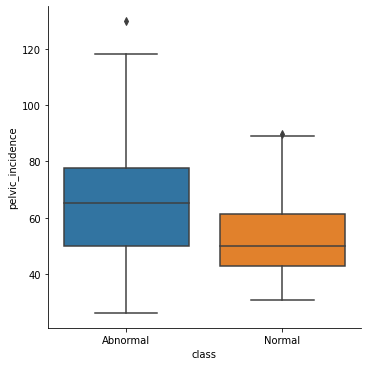

In [85]:
sns.catplot(x='class',y='pelvic_incidence',data=data,kind='box');

# Veri Ön İşleme

- object tipi bizim o değişkenin kategorik olduğunun bigisini bize verir

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


- tipi object olan kategorik değişkenimizin tipini category yapıyoruz

In [98]:
data['class'] = pd.Categorical(data['class'])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pelvic_incidence          310 non-null    float64 
 1   pelvic_tilt numeric       310 non-null    float64 
 2   lumbar_lordosis_angle     310 non-null    float64 
 3   sacral_slope              310 non-null    float64 
 4   pelvic_radius             310 non-null    float64 
 5   degree_spondylolisthesis  310 non-null    float64 
 6   class                     310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


- Kategorik değişkenimizi inceleyelim.
- Datamızdan alıyoruz
- Kategorik değişkenimizin tipini category yaptığımız için datamızı seçerken include = category olarak yapacağız

In [100]:
kat_df = data.select_dtypes(include=['category'])

In [101]:
kat_df

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal
...,...
305,Normal
306,Normal
307,Normal
308,Normal


- Kategorik değişkenin tüm sınıflarını görelim

In [102]:
import numpy as np

kat_df_unique = np.unique(kat_df)

In [103]:
kat_df_unique

array(['Abnormal', 'Normal'], dtype=object)

- Sınıflarımızın sayısına bakalım

In [104]:
kat_df.value_counts().count()

2

- Sınıflarımızın veri setinde ki sayısına bakalım

In [105]:
kat_df.value_counts()

class   
Abnormal    210
Normal      100
dtype: int64

- Kategorik verilerimizi label Encoder ile 0-1'lerden oluşan sınıflara çevireceğiz

In [106]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

kat_df = label.fit_transform(kat_df)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
kat_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

- Datamız içerisindeki class değişkenimizın sınıflarını aşağıdaki gibi labelEncoder ile 0-1 yapabiliriz

In [108]:
data['class'] =label.fit_transform(data['class'])

In [109]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


- Datamızdan class değişkenimizi çıkaracağız

In [110]:
data = data.drop('class',axis=1)

data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


- Datamızı Train ve Test seti olarak ayırıyoruz 

In [111]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,kat_df,test_size=0.30,random_state=18)

In [112]:
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(217, 6)
x_test :(93, 6)
y_train :(217,)
y_test :(93,)


- Bazı algoritmalarımız için x_train ve x_test veri setlerimize Standartlaştırma işlemi uygulamamız lazım

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

- x_train ve x_test veri setlerimizi standartlaştırma işlemi uyguluyoruz

In [114]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
x_train_scaled

array([[ 1.23135028,  1.12008762,  1.34235011,  0.77362548, -0.09684902,
         1.13151353],
       [-0.41249362,  0.13137564, -1.05853989, -0.65710361,  0.24888775,
        -0.70079055],
       [-0.9272447 , -0.7555565 , -0.41585952, -0.65161459,  0.8766769 ,
         0.32117844],
       ...,
       [-0.36142661, -0.57091186, -0.61274998, -0.03686555, -0.05195944,
         0.41745169],
       [ 0.36101131, -0.11596814, -0.07048853,  0.57586914,  1.43809038,
        -0.7125783 ],
       [ 0.31595755,  0.29544568, -1.11556347,  0.19219428,  0.78907842,
        -0.82242116]])

In [ ]:
x_test_scaled

# KNN 

- KNN algoritması sınıflandırma yaparken yeni verimizin çevresindeki en yakın , bizim belirlediğimiz k sınıf sayısının sıklığına göre sınıflandırm yapar
- Çevresindeki değerlere uzaklık hesabı yapar.Uzaklık hesabı yapacağı için verilerimizi standartlaştırma işlemine sokarız

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

- Modelimizi, Standartlaştırma yaptığımız x_train_scaled ve y_train veri setimiz ile fit edip, oluşturuyoruz

In [117]:
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- Modelimizi kullanarak tahmin modelleleri elde ediyoruz

In [118]:
y_pred = knn_model.predict(x_test_scaled)

- Modelimizin doğruluk oranına bakalım

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7741935483870968

- Confusion matrix ile model sonuçlarımızı değerlendirelim

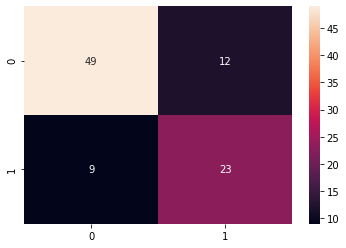

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True);

## Model Tuning 

- KNN'de optimize edeceğimiz hiperparametre değerimiz "**k**" sayısıdır. Yani KNN modelimizin **"n_neighbors"** parametresidir.

- Optimize etmesini istediğimiz değerleri verirken ;
  - Algortimanın ön tanımlı (**default**) değerlerinden yararlanabiliriz
  - **n_neighbors** parametresi'nin ön tanımlı değeri 5'tir.

In [121]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- Optimize edeceğimiz n_neighbors parametresine denemesini istediğimiz değer aralıkları veriyoruz

In [122]:
import numpy as np

knn_params = {'n_neighbors':np.arange(1,50)}

- Bu değer aralıklarını denemesini ve modelimiz için en iyi **n_neighbors** parametre değerini bize vermesi için ;

  - **GridSearchCV** metodunu kullanacağız

- **cv=10** diyerek 10 katlı Cross-validation uygulamış oluyoruz

In [123]:
from sklearn.model_selection import GridSearchCV

knn_cv = GridSearchCV(estimator = knn_model ,param_grid= knn_params , cv=10,verbose=2)

- GridSearchCV metodu ile oluşturacağımız modelimizi fit ediyoruz

In [124]:
knn_cv.fit(x_train,y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    2.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

- **n_neighbors** parametresine vermiş olduğumuz değerleri deneyerek modelimiz için en iyi , optimum değere bakalım

In [125]:
knn_cv.best_params_

{'n_neighbors': 17}

- Modelimiz için en iyi, optimum n_neighbors parametresi değeri 17'ymiş.
- Şimdi bu değeri kullanarak yeni bir KNN modeli oluşturacağız

In [126]:
knn_tuned = KNeighborsClassifier(n_neighbors=17)

- En iyi , optimum n_neighbors parametre değeri ile yeniden oluşturacağımız modelimizi fit edip,oluşturuyoruz

In [127]:
knn_tuned.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

- Yeni KNN modelimiz ile yeni tahmin değerleri oluşturalım

In [128]:
y_pred_tuned = knn_tuned.predict(x_test_scaled)

- Yeni KNN modelimizin doğruluk oranına bakalım

In [129]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned,y_test)

0.8279569892473119

- Yeni modelimizi confusin_matrix ile değerlendirelim

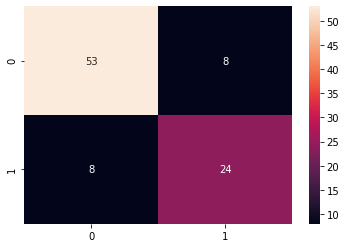

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm_tuned = confusion_matrix(y_pred_tuned,y_test)
sns.heatmap(cm_tuned,annot=True);

In [131]:
modeller = [knn_model,knn_tuned]
for model in modeller:
  print("-"*25)
  acc = accuracy_score(y_test,model.predict(x_test_scaled))
  print("Model : {}\nAccuracy : {}".format(model,acc))

-------------------------
Model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy : 0.7741935483870968
-------------------------
Model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
Accuracy : 0.8279569892473119


- Optimum k değerini grafik yöntemi ile bulalım 
- Aşağıda ki grafikten de anlaşılacağı üzere en yüksek accuracy_score yani doğruluk oranına sahip k değeri 20'ye yakın 17-18 o aralarda olduğunu görüyoruz

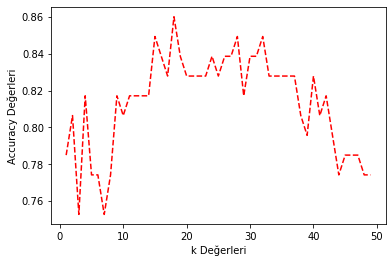

In [132]:
import matplotlib.pyplot as plt

k = np.arange(1,50)
score = []

for i in range(1,50):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train_scaled,y_train)
  y_pred_mod = model.predict(x_test_scaled)
  score.append(accuracy_score(y_pred_mod,y_test))
plt.plot(k,score,'r--')
plt.xlabel("k Değerleri")
plt.ylabel("Accuracy Değerleri");

- Score değerleri, bizim doğruluk oranlarımızın yani accuracy_score değerlerimizin olduğu listemizdi.
- En yüksek score değerine sahip k değerinin 17 olduğunu da bu şekilde görebiliriz

In [133]:
print("En yüksek değeri veren k değeri :" + str(np.argmax(score)))
print("En yüksek accuracy_score :" + str(np.max(score)))

En yüksek değeri veren k değeri :17
En yüksek accuracy_score :0.8602150537634409


# Support Vector Machine 

In [134]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

- Modelimizi fit edip, oluşturuyoruz

In [135]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- Modelimiz ile tahmin değerleri oluşturalım

In [136]:
y_pred = svc.predict(x_test) 

- Modelimizin doğruluk oranına bakalım

In [137]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8172043010752689

- .score() metodu ile doğruluk oranının değeri aynıdır

In [138]:
svc.score(x_test,y_test)

0.8172043010752689

- confusion matrix ile model tahmin sonuçlarını değerlendirelim

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

- Confusion matrix sonuçlarını görselleştirelim 

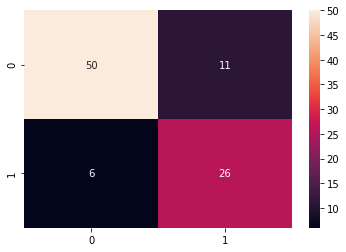

In [140]:
import seaborn as sns 

sns.heatmap(cm,annot=True,linecolor='red');

## Model Tuning

- Burada optimize edeeğimiz hiperparametre "C" parametresidir
- **C parametresi** ; Oluşturulacak olan doğrunun veya ayrımın oluşmasıyla ilgili kontrol etme imkanı sağlayan parametredir
- **Gamma parametresi** ; Default olarak "scale" değerini alır. Ama biz model tuning ederken model için en iyi değerleri denemsini istediğimiz değerleri verirken integer değerler veririz.

  - **NOT** = **gamma** parametresi, **kernel** parametresine '**rbf**' değerini verdiğimizde önemli bir parametre oluyor

In [141]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- Optimize edeceğimiz parametrelerimize model için en iyi değerleri denemesini istediğimiz değerleri verdik

In [142]:
svc_params = {'C':[0.01,0.5,1,1.5,2]}

- GridSearchCV metodu ile bu değerleri deneyip model için en iyi değerleri bulacağız
- 10 katlı Cross-validation uyguluyoruz

In [143]:
from sklearn.model_selection import GridSearchCV

svc_cv = GridSearchCV(estimator = svc,param_grid = svc_params,cv=10,verbose=2)

- GridSearchCV metodu ile oluşturduğumuz modelimizi fit edip, oluşturuyoruz

In [144]:
svc_cv.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.5, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.5, 1, 1.5, 2]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

- C ve gamma parametrelerimizin Modelimiz için en iyi değerlerine bakalım

In [145]:
svc_cv.best_params_

{'C': 0.01}

- Bu değerleri kullanarak yeni bir SVC modeli oluşturucağız

In [146]:
svc_tuned = SVC(C=0.01,kernel='linear',probability=True)

- Modelimiz için en iyi değerler ile modelimizi fit edip, oluşturuyoruz

In [147]:
svc_tuned.fit(x_train,y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

- Modelimiz için en iyi değerleri ile oluşturduğumuz modelimiz ile tahmin değerleri oluşturuyoruz

In [148]:
y_pred_tuned = svc_tuned.predict(x_test)

- Yeni modelimizin accuracy_score değerine yani doğruluk oranına bakalım

In [149]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned,y_test)

0.8172043010752689

In [150]:
svc_tuned.score(x_test,y_test)

0.8172043010752689

- Yeni modelimizin confusion matrix sonuçlarına bakalım

In [151]:
from sklearn.metrics import confusion_matrix

cm_tuned = confusion_matrix(y_pred_tuned,y_test)

- Görselleştirelim 

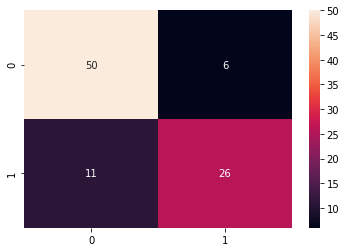

In [152]:
import seaborn as sns

sns.heatmap(cm_tuned,annot=True);

- Modelimizin Roc Curve ile değerlendirelim
- Tahmin değerlerimizin olasılık değerlerini alalım

In [153]:
y_pred_proba = svc_tuned.predict_proba(x_test)

In [154]:
y_pred_proba = y_pred_proba[:,1]

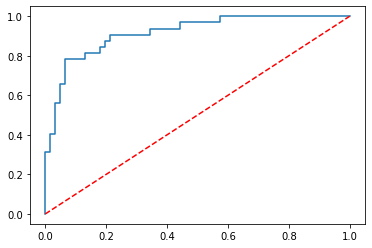

In [155]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--'); 

# Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()

- Modelimizi fit edip oluşuralım

In [157]:
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- Modelimiz ile tahmin değerleri oluşturalım

In [158]:
y_pred = dtc_model.predict(x_test)

- Modelimizin doğruluk oranına bakalım

In [159]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,y_pred)

0.7204301075268817

- Modelimizi confusion matrix sonuçları ile değerlendirelim

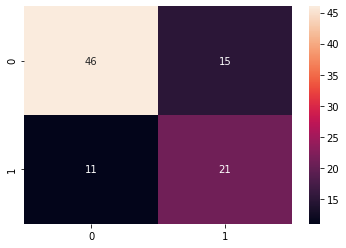

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True);

## Model Tuning 

- Optimize edeceğimiz parametrelerimiz; 

  - **max_depth**
  - **min_samples_split**
- min_samples_split parametresini 2'den başlatmamızın sebebi min_samples_split default olarak **2** değerini alır

In [162]:
dtc_params = {'max_depth':range(1,10),
              'min_samples_split':range(2,10)}

- GridSearchCV metodu ile bu değerlerimizi deneyeceğiz

In [163]:
from sklearn.model_selection import GridSearchCV

dtc_cv = GridSearchCV(estimator=dtc_model,param_grid = dtc_params, cv=10,verbose=2)

- GridSeachCV ile oluşturacağımız modeli fit edip, oluşturuyoruz

In [164]:
dtc_cv.fit(x_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    2.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         

- Denediğimiz değerlerden modelimiz için en iyi değerlere bakalım

In [165]:
dtc_cv.best_params_

{'max_depth': 7, 'min_samples_split': 7}

In [166]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator= dtc_model,X= x_test, y=y_test, cv=10)

array([0.7       , 0.6       , 1.        , 0.66666667, 0.44444444,
       0.55555556, 1.        , 0.44444444, 0.77777778, 0.88888889])

In [167]:
cross_val_score(estimator= dtc_model,X= x_test, y=y_test, cv=10).mean()

0.6777777777777777

- Model için en iyi değerler ile yeni Decision Tree Classifier modeli oluşturucağız

In [168]:
dtc_tuned = DecisionTreeClassifier(max_depth=2 , min_samples_split=2)

- Model için en iyi değerler ile oluşturacağımız modeli fit edip, oluşturacağız

In [169]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- Tahmin değerleri oluşturuyoruz

In [170]:
y_pred_tuned = dtc_tuned.predict(x_test)

- Modelimizin accuracy_score değerimize bakalım

In [171]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned,y_test)

0.7634408602150538

- Optimize ettiğimiz parametre değerleriyle yeniden oluşturduğumuz modelimizi confusion_matrix ile değerlendirelim

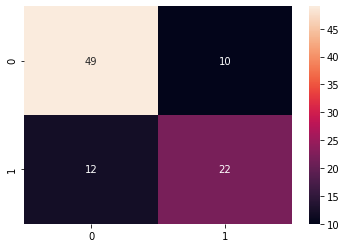

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_tuned = confusion_matrix(y_pred_tuned,y_test)
sns.heatmap(cm_tuned,annot=True);

- Modelimizin Roc Eğrisi ile değerlendirelim

In [173]:
y_pred_proba = dtc_tuned.predict_proba(x_test)

y_pred_proba = y_pred_proba[:,1]

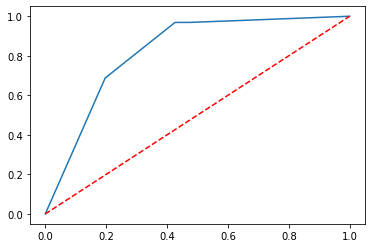

In [174]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--');

# Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

- Modelimizi fit edip, oluşturuyoruz


In [176]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- Modelimiz ile tahmin değerleri elde ediyoruz

In [177]:
y_pred = rf_model.predict(x_test)

- Modelimizin accuracy_score değerine yani doğruluk oranına bakalım

In [178]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7956989247311828

- Modelimizi confusion_matrix ile değerlendirelim

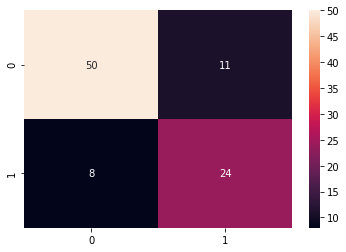

In [179]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# Model Tuning 

- Optimize edeceğimiz parametrelerimiz;
  - **n_estimators**:  Kullanılacak ağaç sayısı.Default değeri 10'dur.Fakat bilimsel çalışmalara göre bu değer 500 yada 1000 olmalı.Bu her çalışma için aynı olacak anlamına da gelmiyor
  - **max_features**: Bölünmelerde göz önünde bulundurulacak değişken sayısıdır.Önemli parametredir
  - **max_depth**

In [180]:
rf_params = {'n_estimators':[100,300,500],
             'max_features':[2,4,6,8],
             'max_depth':[2,4,6,8]}

- GridSearchCV metodu ile bu parametrelerin model için en iyi,optimum değerlerini bulacağız
- 10 katlı cross_validation uyguluyoruz

In [181]:
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(estimator = rf_model , param_grid=rf_params, cv=10, verbose=2)

- GridSearchCV metodunu kullanarak oluşturduğumuz modelimizi fit edip, oluşturuyoruz

In [182]:
rf_cv.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=100 ...................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=2, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=2, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=2, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=2, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=2, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=2, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=300, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=2, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=2, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=6, max_features=2, n_estimators=100 ...................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=6, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=6, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=6, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=6, max_features=8, n_estimators=100 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=6, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=6, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=6, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=100 ...................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=300 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=300, total=   0.1s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s
[CV] max_depth=8, max_features=8, n_estimators=500 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.0min finished


[CV] .... max_depth=8, max_features=8, n_estimators=500, total=   0.2s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

- Parametrelerimizin model için en iyi değerlerine bakalım

In [183]:
rf_cv.best_params_

{'max_depth': 4, 'max_features': 2, 'n_estimators': 500}

- Bu değerler ile yeni Random Forest modelimizi oluşturacağız

In [184]:
rf_tuned = RandomForestClassifier(max_depth=8,max_features=2,n_estimators=100)

- Modelimizi fit edip, oluşturuyoruz

In [185]:
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- Yeni oluşturduğumuz model ile tahmin değerleri oluşturalım

In [186]:
y_pred_tuned = rf_tuned.predict(x_test)

- Modelimizin accuracy_score değerine bakalım

In [187]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned,y_test)

0.7849462365591398

- Modelimizi confusion_matrix ile değerlendirelim

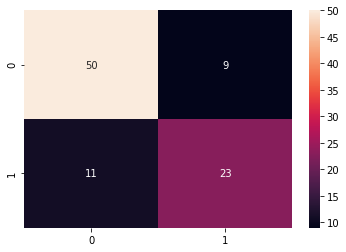

In [188]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm_tuned = confusion_matrix(y_pred_tuned,y_test)
sns.heatmap(cm_tuned, annot=True);

- Modelimizin Roc Eğrisi ile değerlendirelim

- İlk olarak tahmin değerlerimizin olasılık değerlerini bulalım

In [190]:
y_probs = rf_tuned.predict_proba(x_test)

y_probs = y_probs[:,1]

In [191]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_probs)

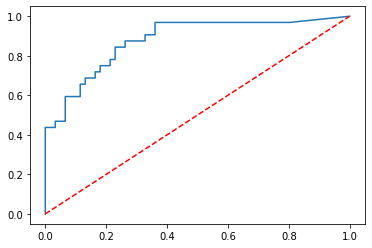

In [192]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--');

- Değişkenlerimizin, modelimiz üzerinde ki etkilerine bakacağız 
- Modelimiz üzerinde ki önem değerlerine bakacağız

In [193]:
importance = rf_tuned.feature_importances_

- DataFrame yapıyoruz

In [194]:
importance = pd.DataFrame(data={'importance':importance},index=x_train.columns)

In [195]:
importance

,importance
pelvic_incidence,0.130814
pelvic_tilt numeric,0.106372
lumbar_lordosis_angle,0.152677
sacral_slope,0.084018
pelvic_radius,0.156401
degree_spondylolisthesis,0.369718


In [196]:
importance = importance*100

importance

,importance
pelvic_incidence,13.081388
pelvic_tilt numeric,10.637179
lumbar_lordosis_angle,15.267699
sacral_slope,8.401844
pelvic_radius,15.640119
degree_spondylolisthesis,36.971772


- Değerleri küçükten büyüğe doğru sıralıyoruz

In [197]:
importance = importance.sort_values(by='importance')

importance

,importance
sacral_slope,8.401844
pelvic_tilt numeric,10.637179
pelvic_incidence,13.081388
lumbar_lordosis_angle,15.267699
pelvic_radius,15.640119
degree_spondylolisthesis,36.971772


- Değişkenlerimizin model üzerindeki önem değerlerine grafik üzerinde değerlendirioruz

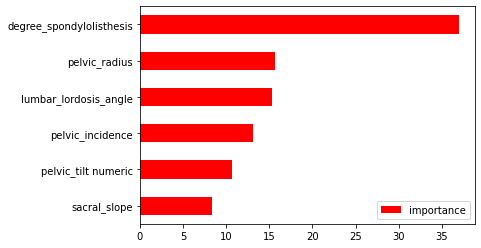

In [198]:
importance.plot(kind='barh',color='r');

# Gradient Boosting Machine - GBM 

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

- Gradient Boosting modelimizi fit edip , oluşturuyoruz

In [200]:
gbm_model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- Modelimiz ile tahmin değerleri oluşturalım

In [201]:
y_pred = gbm_model.predict(x_test)

- Modelimizin accuracy_score , doğruluk oranı değerine baklaım

In [202]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8279569892473119

- confusion matrix ile modelimizi değerlendirelim
- Grafik üzerinde değerlendirme yapalım

In [203]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

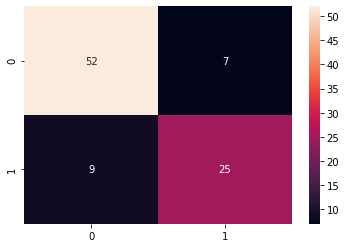

In [204]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True);

## Model Tuning

- Optimize edeceğimiz parametrelerimiz ; 

  - learning_rate
  - n_estimators
  - max_depth
  - min_samples_split

- Parametrelerimize deneyeceği değerleri veriyoruz

In [205]:
gbm_params = {'learning_rate':[0.001,0.01,0.1,0.5],
              'n_estimators':[5,10,50,100,200,500],
              'max_depth':[2,6,8,10],
              'min_samples_split':[2,6,8,10]}

- GridSearchCV metodu ile bu değerlerimizi deneyip modelimiz için en iyi değerleri, optimum değerleri bulacağız

In [206]:
from sklearn.model_selection import GridSearchCV

gbm_cv = GridSearchCV(estimator=gbm_model , param_grid=gbm_params, cv=10, verbose=2)

- GridSearchCV metodu ile modelimizi fit edip, oluşturuyoruz

>



In [207]:
gbm_cv.fit(x_train,y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5, total=   0.0s
[CV] learning_rate=0.001, max_depth=2, min_samples_split=2, n_estimators=5 
[CV]  learning_rate=0.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Görüntülenen çıkış son 5000 satıra kısaltıldı.
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_split=8, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=6, min

[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:  8.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

- Denediğimiz parametrelerin modelimiz için en iyi değerlere bakalım

In [208]:
gbm_cv.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 5}

- Bu en iyi değerler ile yeni bir Gradient Boosting modeli oluşturacağız

In [209]:
gbm_tuned = GradientBoostingClassifier(n_estimators=5,max_depth=2,min_samples_split=2,learning_rate=0.5)

- En iyi değerler ile oluşturacağımız modelimizi fit edip,oluşturuyoruz

In [210]:
gbm_tuned.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- Yeni modelimiz ile tahmin değerleri oluşturuyoruz

In [211]:
y_pred_tuned = gbm_tuned.predict(x_test)

- Modelimizin accuracy_score değerine, doğruluk oranına bakalım

In [212]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_tuned,y_test)

0.8172043010752689

- Modelimizi confusioon_matrix ile değerlendirelim

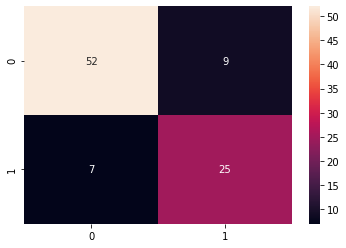

In [213]:
from sklearn.metrics import confusion_matrix

cm_tuned = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_tuned,annot=True);

- Tahmin değerlerimizin olasılık değerlerini alıyoruz

In [214]:
y_probs = gbm_tuned.predict_proba(x_test)

y_probs = y_probs[:,1]

- Modelimizi Roc Eğrisi Grafiği ile değerlendireceğiz

In [215]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_probs)

- Grafiğimizi çizdirelim

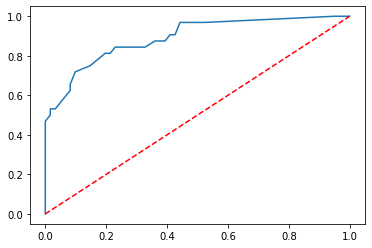

In [216]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--');